Topic:        Challenge Set 7 <br />
Subject:      Classification <br />
Date:         05/03/2018 <br />
Name:         Ben Sturm <br />

Topic: Classification

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

Data:

Challenges 1-10: congressional votes Congressional Voting Records Dataset

Challenge 11: movie data

Challenge 12: breast cancer surgery Haberman Survival Dataset

Data – Congressional Votes

Download the congressional votes data from here: [Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [12]:
import pandas as pd

In [13]:
column_names = ['party']
column_names = column_names + ['vote{}'.format(i) for i in range(1,17)]
column_names
votes = pd.read_csv('voting_records.csv', names=column_names)

In [14]:
votes.reset_index()

,index,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [15]:
#replaces all 'y' and 'n' to 1 and 0 respectively
votes2 = votes.replace('y',1)
votes2 = votes2.replace('n',0)

In [16]:
votes2.head()

,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [21]:
def cat_imputation(df,column):
    num_zeros = sum(df[column]==0)
    num_ones = sum(df[column]==1)
    prob = num_ones/(num_ones+num_zeros)
    s1 = df[column].replace('?',prob)
    return s1

In [22]:
def replace_qmarks(df):
    df_mod = df.copy()
    for col in df_mod.columns:
        if 'vote' in col:
            df_mod[col] = cat_imputation(df_mod,col)
    
    return df_mod

In [23]:
votes3 = replace_qmarks(votes2)

In [24]:
votes3.head()

,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


The dataframe 'votes3' above contains 1s, 0s, or probabilities for any entries that had a '?'.

In [331]:
votes3.to_pickle('votes3.pkl')

### Challenge 2

Challenge 2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
votes3['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [75]:
y = votes3['party']
X = votes3.drop('party',axis=1)
X.shape

(435, 16)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.30, random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score

Which k value gives the highest accuracy?

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [30]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,ytrain)
    ytest_pred = knn.predict(Xtest)
    scores = accuracy_score(ytest,ytest_pred)
    k_scores.append(scores)
print(k_scores)

[0.9007633587786259, 0.8931297709923665, 0.9007633587786259, 0.9007633587786259, 0.916030534351145, 0.9312977099236641, 0.916030534351145, 0.9236641221374046, 0.9312977099236641, 0.9312977099236641, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.916030534351145, 0.916030534351145, 0.916030534351145]


In [31]:
import numpy as np
idx = np.argmax(k_scores)
print("The maximum accuracy is {:.4f} and the corresponding k-value is {}.".format(k_scores[idx],k_range[idx]))

The maximum accuracy is 0.9313 and the corresponding k-value is 6.


### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
C_params = [.001,.01,.1,1,10,100]
logreg_scores = []
for C in C_params:
    logreg = LogisticRegression(C=C).fit(Xtrain,ytrain)
    ytest_pred = logreg.predict(Xtest)
    scores = accuracy_score(ytest,ytest_pred)
    logreg_scores.append(scores)
print(logreg_scores)

[0.8549618320610687, 0.8854961832061069, 0.9312977099236641, 0.9389312977099237, 0.9389312977099237, 0.9312977099236641]


In [34]:
idx2 = np.argmax(logreg_scores)
print("The maximum accuracy is {:.4f} and the corresponding C-value is {}".format(logreg_scores[idx2],C_params[idx2]))

The maximum accuracy is 0.9389 and the corresponding C-value is 1


### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [36]:
#sns.set_style("whitegrid")

In [37]:
party_count = votes3['party'].value_counts()

In [1]:
x=[1,2]
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x, party_count.values)
ax.set_xticks(x)
ax.set_xticklabels((party_count.index[0],party_count.index[1]), fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.set_title('Number of Democrats and Republicans', fontsize=16)

NameError: name 'plt' is not defined

In [50]:
def predict_democrat(X):
    num_rows = np.shape(X)[0]
    y_pred = ['democrat' for i in range(num_rows)]
    return y_pred

In [52]:
def predict_republican(X):
    num_rows = np.shape(X)[0]
    y_pred = ['republican' for i in range(num_rows)]
    return y_pred

In [54]:
ytest_pred_democrat = predict_democrat(Xtest)
scores = accuracy_score(ytest,ytest_pred_democrat)
print("Accuracy score when predicting just democrat: {:.3f}".format(scores))

Accuracy score when predicting just democrat: 0.588


In [56]:
ytest_pred_republican = predict_republican(Xtest)
scores = accuracy_score(ytest,ytest_pred_republican)
print("Accuracy score when predicting just republican: {:.3f}".format(scores))

Accuracy score when predicting just republican: 0.412


The above results make sense, since they should add up to 1, which they do.

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [63]:
def get_party_accuracies_with_knn():
    k_range = list(range(1, 21))
    k_scores_dem = []
    k_scores_rep = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xtrain,ytrain)
        ytest_pred = knn.predict(Xtest)
        scores = accuracy_score(ytest,ytest_pred)
        tn, fp, fn, tp = confusion_matrix(ytest,ytest_pred,labels=('democrat','republican')).ravel()  #there probably is a better way to do this, but I'm not sure how
        dem_accuracy = tp/(tp+fn)
        rep_accuracy = tn/(tn+fn)
        k_scores_dem.append(dem_accuracy)
        k_scores_rep.append(rep_accuracy)
        
    return k_scores_dem, k_scores_rep

In [64]:
(k_scores_dem,k_scores_rep)=get_party_accuracies_with_knn()

Text(0.5,1,'Classification Accuracies using the KNN model')

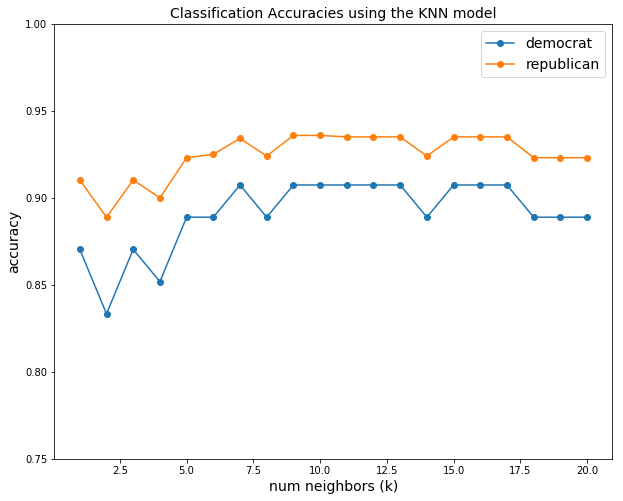

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(k_range,k_scores_dem,'-o',label='democrat')
ax.plot(k_range,k_scores_rep,'-o',label='republican')
ax.set_ylim(.75,1)
ax.legend(fontsize=14)
ax.set_xlabel('num neighbors (k)', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Classification Accuracies using the KNN model', fontsize=14)

In [66]:
def get_party_accuracies_with_logreg():
    logreg = LogisticRegression(C=1).fit(Xtrain,ytrain)
    ytest_pred = logreg.predict(Xtest)
    tn, fp, fn, tp = confusion_matrix(ytest,ytest_pred,labels=('democrat','republican')).ravel()  #there probably is a better way to do this, but I'm not sure how
    dem_accuracy = tp/(tp+fn)
    rep_accuracy = tn/(tn+fn)
    
    return dem_accuracy, rep_accuracy

In [67]:
(logreg_score_dem,logreg_score_rep)=get_party_accuracies_with_logreg()

Text(0.5,1,'Classification Accuracies for Democrats and Republicans')

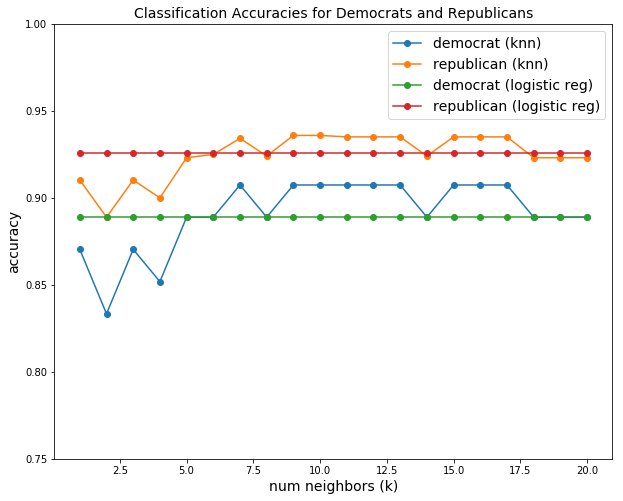

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(k_range,k_scores_dem,'-o',label='democrat (knn)')
ax.plot(k_range,k_scores_rep,'-o',label='republican (knn)')
ax.plot(k_range,logreg_score_dem*np.ones(len(k_range)),'-o',label='democrat (logistic reg)')
ax.plot(k_range,logreg_score_rep*np.ones(len(k_range)),'-o',label='republican (logistic reg)')
ax.set_ylim(.75,1)
ax.legend(fontsize=14)
ax.set_xlabel('num neighbors (k)', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Classification Accuracies for Democrats and Republicans', fontsize=14)

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [85]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(.1,1,5)
train_sizes, logreg_train_scores, logreg_test_scores = learning_curve(LogisticRegression(C=1), X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

In [87]:
logreg_train_cv_accuracy = np.mean(logreg_train_scores,axis=1)
logreg_test_cv_accuracy = np.mean(logreg_test_scores,axis=1)

Text(0.5,1,'Learning curve for Logistic Regression model')

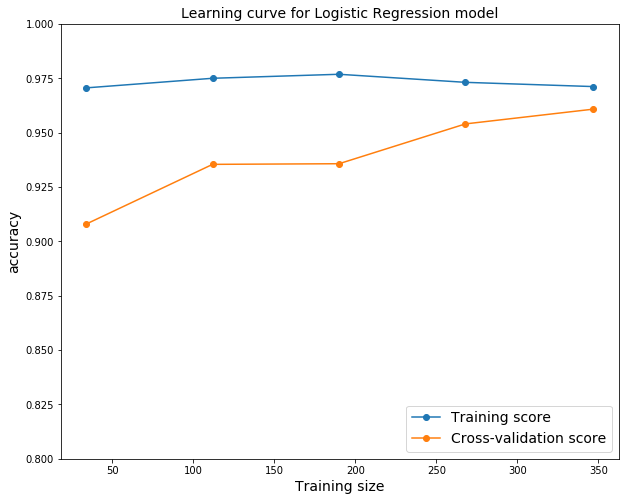

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(train_sizes,logreg_train_cv_accuracy,'-o',label='Training score')
ax.plot(train_sizes,logreg_test_cv_accuracy,'-o',label='Cross-validation score')
ax.set_ylim(.8,1)
ax.legend(fontsize=14,loc=4)
ax.set_xlabel('Training size', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Learning curve for Logistic Regression model', fontsize=14)

In [92]:
train_sizes, knn_train_scores, knn_test_scores = learning_curve(KNeighborsClassifier(n_neighbors=6), X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

In [93]:
knn_train_cv_accuracy = np.mean(knn_train_scores,axis=1)
knn_test_cv_accuracy = np.mean(knn_test_scores,axis=1)

Text(0.5,1,'Learning curve for KNN model with k=6')

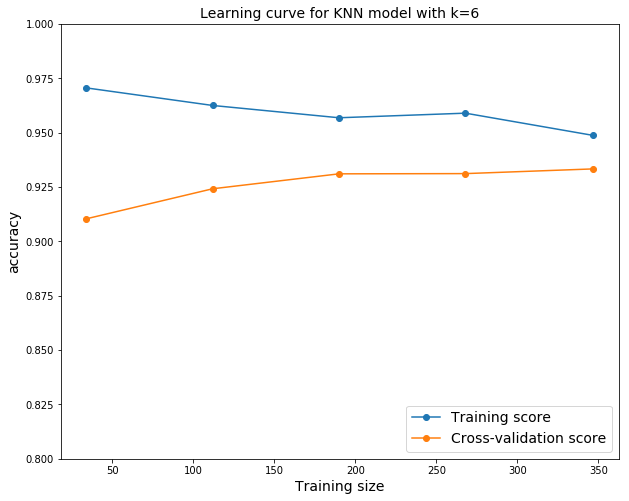

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(train_sizes,knn_train_cv_accuracy,'-o',label='Training score')
ax.plot(train_sizes,knn_test_cv_accuracy,'-o',label='Cross-validation score')
ax.set_ylim(.8,1)
ax.legend(fontsize=14,loc=4)
ax.set_xlabel('Training size', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Learning curve for KNN model with k=6', fontsize=14)

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

SVM (Support Vector Machine) Classifier

from sklearn.svm import SVC

Decision Tree

from sklearn.tree import DecisionTreeClassifier

Random Forest

from sklearn.ensemble import RandomForestClassifier


In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
gnb = GaussianNB().fit(Xtrain,ytrain)
gnb_score = gnb.score(Xtest,ytest)
print('Gaussian Naive Bayes test accuracy {:.3f}'.format(gnb_score))

Gaussian Naive Bayes test accuracy 0.939


In [97]:
svm = SVC().fit(Xtrain,ytrain)
svm_score = svm.score(Xtest,ytest)
print('SVM Classifier test accuracy: {:.3f}'.format(svm_score))

SVM Classifier test accuracy: 0.954


In [100]:
tree = DecisionTreeClassifier().fit(Xtrain,ytrain)
tree_score = tree.score(Xtest,ytest)
print('Decision Tree test accuracy: {:.3f}'.format(tree_score))

Decision Tree test accuracy: 0.947


In [101]:
forest = RandomForestClassifier().fit(Xtrain,ytrain)
forest_score = forest.score(Xtest,ytest)
print('Random Forest test accuracy: {:.3f}'.format(forest_score))

Random Forest test accuracy: 0.947


### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [102]:
from sklearn.model_selection import cross_val_score

In [106]:
gnb_cross_val = cross_val_score(GaussianNB(),Xtrain,ytrain,cv=3)
print('Gaussian Naive Bayes Cross-validation score: {:.3f}'.format(np.mean(gnb_cross_val)))

Gaussian Naive Bayes Cross-validation score: 0.928


In [107]:
svm_cross_val = cross_val_score(SVC(),Xtrain,ytrain,cv=3)
print('SVM Classifier Cross-validation score: {:.3f}'.format(np.mean(svm_cross_val)))

SVM Classifier Cross-validation score: 0.964


In [108]:
tree_cross_val = cross_val_score(DecisionTreeClassifier(),Xtrain,ytrain,cv=3)
print('Decision Tree Cross-validation score: {:.3f}'.format(np.mean(tree_cross_val)))

Decision Tree Cross-validation score: 0.947


In [109]:
forest_cross_val = cross_val_score(RandomForestClassifier(),Xtrain,ytrain,cv=3)
print('Random Forest Cross-validation score: {:.3f}'.format(np.mean(forest_cross_val)))

Random Forest Cross-validation score: 0.961


### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

We can start this challenge from the votes2 dataframe.

In [110]:
votes2.head()

,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


We first need to replace all ? with the mode of that column.

In [118]:
def imputation2(df,column):
    num_zeros = sum(df[column]==0)
    num_ones = sum(df[column]==1)
    if num_zeros > num_ones:
        mode = 0
    else:
        mode = 1
    s1 = df[column].replace('?',mode)
    return s1

In [119]:
def replace_qmarks2(df):
    df_mod = df.copy()
    for col in df_mod.columns:
        if 'vote' in col:
            df_mod[col] = imputation2(df_mod,col)
    
    return df_mod

In [120]:
votes_chal10 = replace_qmarks2(votes2)

In [121]:
votes_chal10.head()

,party,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15,vote16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [122]:
y = votes_chal10['vote16']
X = votes_chal10.drop(['party','vote16'],axis=1)

In [123]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {'C':[.001,.01,.1,1,10,100]}

In [127]:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.857


### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [177]:
movies = pd.read_csv('2013_movies.csv')

In [178]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [182]:
movies['ReleaseDateTime'] = pd.to_datetime(movies['ReleaseDate'] , format="%Y-%m-%d %H:%M:%S")
movies['ReleaseMonth'] = movies['ReleaseDateTime'].apply(lambda row: row.month)

In [191]:
movies.describe()

,Budget,DomesticTotalGross,Runtime,ReleaseMonth
count,8.900000e+01,1.000000e+02,100.000000,100.000000
mean,7.474719e+07,1.005969e+08,112.260000,7.000000
std,5.941692e+07,8.739641e+07,18.190696,3.420083
min,2.500000e+06,2.556825e+07,75.000000,1.000000
25%,2.800000e+07,4.270413e+07,98.000000,4.000000
50%,5.500000e+07,6.954237e+07,112.000000,7.000000
75%,1.100000e+08,1.204759e+08,123.000000,10.000000
max,2.250000e+08,4.246680e+08,180.000000,12.000000


In [200]:
mask_null_budget = movies['Budget'].isnull()
movies[mask_null_budget]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateTime,ReleaseMonth
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,2013-06-21,6
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00,2013-12-13,12
66,Tyler Perry's A Madea Christmas,NaN,52543354,Tyler Perry,PG-13,105,2013-12-13 00:00:00,2013-12-13,12
67,Tyler Perry's Temptation: Confessions of a Mar...,NaN,51975354,Tyler Perry,PG-13,111,2013-03-29 00:00:00,2013-03-29,3
73,Instructions Not Included,NaN,44467206,NaN,PG-13,115,2013-08-30 00:00:00,2013-08-30,8
74,Snitch,NaN,42930462,Ric Roman Waugh,PG-13,112,2013-02-22 00:00:00,2013-02-22,2
78,August: Osage County,NaN,37738810,John Wells,R,130,2013-12-27 00:00:00,2013-12-27,12
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04 00:00:00,2013-01-04,1
85,Blue Jasmine,NaN,33405481,Woody Allen,PG-13,98,2013-07-26 00:00:00,2013-07-26,7
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03 00:00:00,2013-07-03,7


To make things easier, I'm going to drop the rows that a budget of 'NaN'.

In [201]:
movies2 = movies[movies['Budget'].notnull()]

In [332]:
movies2.to_pickle('movies2.pkl')

In [202]:
y = movies2['Rating']
X = movies2[['Budget','DomesticTotalGross','Runtime','ReleaseMonth']]

In [203]:
ratings = y.value_counts()
ratings.index.format()

['PG-13', 'R', 'PG']

Text(0.5,1,'Frequency of each movie rating')

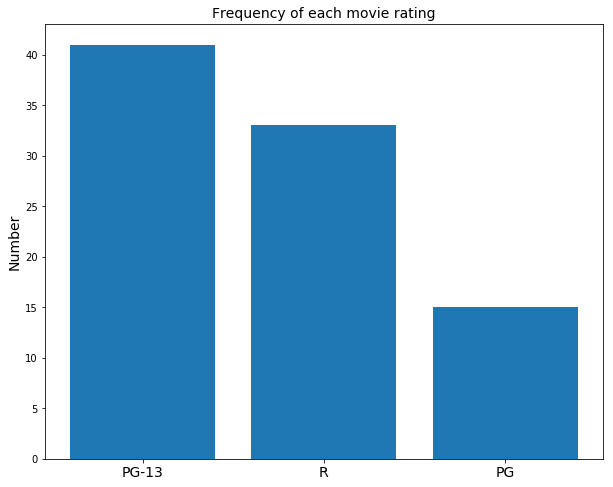

In [205]:
x=[1,2,3]
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x, ratings.values)
ax.set_xticks(x)
ax.set_xticklabels(ratings.index.format(), fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.set_title('Frequency of each movie rating', fontsize=14)

In [235]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=4444)

In [236]:
param_grid = {'C':[.001,.01,.1,1,10,100]}
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=3)

In [237]:
grid_search.fit(Xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [238]:
print("Best parameters for Logistic Regression: {}".format(grid_search.best_params_))
print("Best Logistic Regression cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters for Logistic Regression: {'C': 0.001}
Best Logistic Regression cross-validation score: 0.516


In [239]:
y_pred = grid_search.predict(Xtest)

In [240]:
print("Best Logistic Regression test score: {:.3f}".format(accuracy_score(ytest,y_pred)))

Best Logistic Regression test score: 0.481


Note: The above result is not very good.

In [241]:
k_range = list(range(1, 21))
param_grid = {'n_neighbors':k_range}

In [242]:
grid_search2 = GridSearchCV(KNeighborsClassifier(),param_grid,cv=3)
grid_search2.fit(Xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [243]:
print("Best parameters for KNN: {}".format(grid_search2.best_params_))
print("Best KNN cross-validation score: {:.3f}".format(grid_search2.best_score_))

Best parameters for KNN: {'n_neighbors': 18}
Best KNN cross-validation score: 0.613


In [244]:
y_pred2 = grid_search2.predict(Xtest)
print("Best KNN test score: {:.3f}".format(accuracy_score(ytest,y_pred2)))

Best KNN test score: 0.370


Now I will make a dumb predictor that always predicts a PG-13 film and see how it performs.

In [245]:
def predict_pg13(X):
    num_rows = np.shape(X)[0]
    y_pred = ['PG-13' for i in range(num_rows)]
    return y_pred

In [246]:
y_pred3 = predict_pg13(Xtest)
print("My dumb predictor has test score of: {:.3f}".format(accuracy_score(ytest,y_pred3)))

My dumb predictor has test score of: 0.444


**Discussion**

Based on the previous results, my dumb predictor which always predicts a PG-13 film actually does better than the KNN model.  The dumb predictor does slightly poorer than the Logistic Regression model.  Although I'm a little surprised neither of my models do better, it could be that the features represented in this dataset are not good predictors of the film ratings.  In that case, you would do best just to predict the most commong film rating.  One of the issues that I might be facing is that KNN doesn't do well when the features aren't scaled, so I'm going to create a new KNN model using scaled data.

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
X_train_scaled = scaler.transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

In [248]:
grid_search2 = GridSearchCV(KNeighborsClassifier(),param_grid,cv=3)
grid_search2.fit(X_train_scaled,ytrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [250]:
print("Best parameters for KNN: {}".format(grid_search2.best_params_))
print("Best KNN cross-validation score: {:.3f}".format(grid_search2.best_score_))

Best parameters for KNN: {'n_neighbors': 17}
Best KNN cross-validation score: 0.597


In [249]:
y_pred4 = grid_search2.predict(X_test_scaled)
print("Best KNN test score: {:.3f}".format(accuracy_score(ytest,y_pred4)))

Best KNN test score: 0.407


After scaling, KNN still doesn't do better than my dumb predictor.

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

    What is the average and standard deviation of the age of all of the patients?
    What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
    What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
    Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
    What is the earliest year of surgery in this dataset?
    What is the most recent year of surgery?
    Use logistic regression to predict survival after 5 years. How well does your model do?
    What are the coefficients of logistic regression? Which features affect the outcome how?
    Draw the learning curve for logistic regression in this case.


In [257]:
column_names = ['age','year','num_nodes','outcome']
cancer = pd.read_csv('haberman_data.csv', names=column_names)

In [258]:
cancer.head()

,age,year,num_nodes,outcome
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [333]:
cancer.to_pickle('cancer.pkl')

In [264]:
print("The average patient age is {:.1f} and the standard deviation is {:.1f}".format(np.mean(cancer['age']),np.std(cancer['age'])))

The average patient age is 52.5 and the standard deviation is 10.8


In [269]:
mask1 = cancer['outcome']==1
mean_age_survived = np.mean(cancer.loc[mask1,'age'])
std_age_survived = np.std(cancer.loc[mask1,'age'])
print("Of those who survived 5 or more years after surgery, the average age was {:.1f} and the std dev was {:.1f}".format(mean_age_survived,std_age_survived))

Of those who survived 5 or more years after surgery, the average age was 52.0 and the std dev was 11.0


In [273]:
mask2 = cancer['outcome']==2
mean_age_died = np.mean(cancer.loc[mask2,'age'])
std_age_died = np.std(cancer.loc[mask2,'age'])
print("Of those who survived fewer than 5 years after surgery, the average age was {:.1f} and the std dev was {:.1f}".format(mean_age_died,std_age_died))

Of those who survived fewer than 5 years after surgery, the average age was 53.7 and the std dev was 10.1


Text(0.5,1,'Histogram of number axillary nodes')

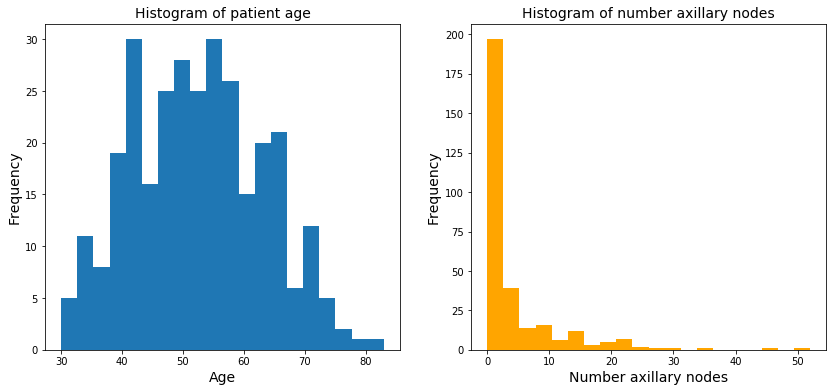

In [287]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].hist(cancer['age'],bins=20,label='age')
ax[1].hist(cancer['num_nodes'],bins=20,label='number axillary nodes',color='orange')
ax[0].set_ylabel('Frequency',fontsize=14)
ax[0].set_xlabel('Age',fontsize=14)
ax[0].set_title('Histogram of patient age',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].set_xlabel('Number axillary nodes',fontsize=14)
ax[1].set_title('Histogram of number axillary nodes',fontsize=14)

In [291]:
print("The earliest year of surgery is 19"+str(min(cancer['year'])))

The earliest year of surgery is 1958


In [293]:
print("The most recent year of surgery is 19"+str(max(cancer['year'])))

The most recent year of surgery is 1969


In [324]:
y = cancer['outcome']
X = cancer.drop('outcome',axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30, random_state=4444)

logreg = LogisticRegression(C=1).fit(Xtrain,ytrain)

print("The training set accuracy is: {:.3f}".format(logreg.score(Xtrain,ytrain)))
print("The test set accuracy is: {:.3f}".format(logreg.score(Xtest,ytest)))


The training set accuracy is: 0.710
The test set accuracy is: 0.815


In [325]:
print("The coefficients for the logistic regression classifier are: ")
logreg.coef_

The coefficients for the logistic regression classifier are: 


array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [326]:
train_sizes = np.linspace(.1,1,5)
train_sizes, logreg_train_scores, logreg_test_scores = learning_curve(LogisticRegression(C=1), X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')

In [327]:
logreg_train_cv_accuracy = np.mean(logreg_train_scores,axis=1)
logreg_test_cv_accuracy = np.mean(logreg_test_scores,axis=1)

Text(0.5,1,'Learning curve for Logistic Regression model')

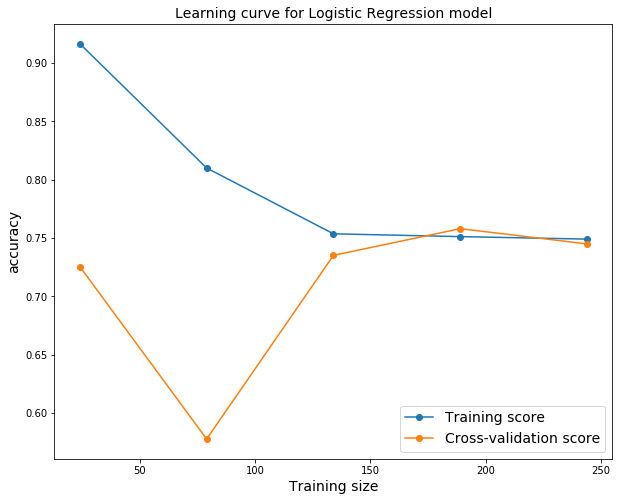

In [328]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(train_sizes,logreg_train_cv_accuracy,'-o',label='Training score')
ax.plot(train_sizes,logreg_test_cv_accuracy,'-o',label='Cross-validation score')
ax.legend(fontsize=14,loc=4)
ax.set_xlabel('Training size', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Learning curve for Logistic Regression model', fontsize=14)